[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


First 5 rows of the dataset:
shape: (5, 15)
┌──────────────┬────────────┬──────────────────────────┬───────────┬───┬──────┬───────┬─────┬──────┐
│ Unnamed: 0.1 ┆ Unnamed: 0 ┆ Text                     ┆ Sentiment ┆ … ┆ Year ┆ Month ┆ Day ┆ Hour │
│ ---          ┆ ---        ┆ ---                      ┆ ---       ┆   ┆ ---  ┆ ---   ┆ --- ┆ ---  │
│ i64          ┆ i64        ┆ str                      ┆ str       ┆   ┆ i64  ┆ i64   ┆ i64 ┆ i64  │
╞══════════════╪════════════╪══════════════════════════╪═══════════╪═══╪══════╪═══════╪═════╪══════╡
│ 0            ┆ 0          ┆ Enjoying a beautiful day ┆ Positive  ┆ … ┆ 2023 ┆ 1     ┆ 15  ┆ 12   │
│              ┆            ┆ at t…                    ┆           ┆   ┆      ┆       ┆     ┆      │
│ 1            ┆ 1          ┆ Traffic was terrible     ┆ Negative  ┆ … ┆ 2023 ┆ 1     ┆ 15  ┆ 8    │
│              ┆            ┆ this mor…                ┆           ┆   ┆      ┆       ┆     ┆      │
│ 2            ┆ 2          ┆ Just finished an 

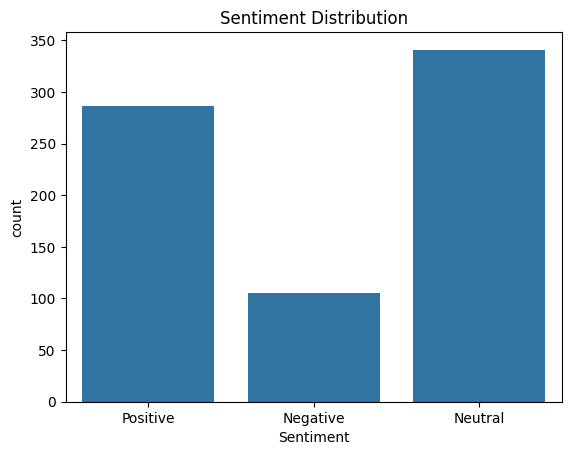


Preprocessed text (first 5 rows):
shape: (5, 1)
┌─────────────────────────────────┐
│ Text                            │
│ ---                             │
│ str                             │
╞═════════════════════════════════╡
│ enjoying beautiful day park     │
│ traffic terrible morning        │
│ finished amazing workout        │
│ excited upcoming weekend getaw… │
│ trying new recipe dinner tonig… │
└─────────────────────────────────┘

Execution time: 0.82 seconds


In [2]:
import time

start = time.time()

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('wordnet')

wordnet.ensure_loaded()

try:
    df = pl.read_csv('datasets/sentimentdataset.csv')
except FileNotFoundError:
    print("Error: 'sentimentdataset.csv' not found.")
    exit()


print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset shape:")
print((df.height, len(df.columns)))
print("\nData types:")
print(df.dtypes)

print("\nSentiment label distribution:")
print(df.select(pl.col("Sentiment")).to_series().value_counts())

sns.countplot(x=df.select("Sentiment").to_series())
plt.title('Sentiment Distribution')
plt.show()

stopwords_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub('<[^>]*>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords_set]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df = df.with_columns([
    pl.col("Text").map_elements(preprocess_text, return_dtype=pl.Utf8).alias("Text")
])

print("\nPreprocessed text (first 5 rows):")
print(df.select("Text").head())

end = time.time()
print(f"\nExecution time: {end - start:.2f} seconds")
